**<h1><center>Bayesian Learning for Partially Observed Dynamical Systems Project</center>**
<center><h3>About Wasserstein distance in Approximate Bayesian Computation</center>


<font color='blue'>Almost everything we will do in this notebook is essentially based on the article of [**Espen Bernton, Pierre E. Jacob, Mathieu Gerber, Christian P. Robert**](https://arxiv.org/abs/1905.03747) </font>, ***''Approximate Bayesian computation with the Wasserstein
distance''***, arXiv:1905.03747v1  [stat.ME]  9 May 2019  
<font color='blue'>Any error or misinterpretation is entirely our responsibility.

**__Students__**:  
  >- SIDIBE Bakary, bsidibe04@gmail.com, M2DS
  >- PEKARSKIKH Svetlana, svetlana.pekarskikh@gmail.com, M2DS
  >- DIOP Seyni, seyni.diop@polytechnique.edu, M2DS

__**Professors**__
 >- Randal DOUC
 >- Sylvain LeCorff

# <font size="5" > $\textbf{Abstract}$ </font>

- <font color='blue'>Problematic: </font>  
> Number of generative statiscal models do not permit the numercial evaluation of their likelihood.
- <font color='blue'>Solution: </font> 
> We use  ABC (Approximate Bayesian Computaion),
which simulates synthetic dataset given the parameters and computes the summaries of these datasets with the corresponding observed values.

- <font color='blue'>To avoid use of summaries and ensuring loss of information: </font> 
>We use the Wasserstein distance between the empirical distributions of the observed and synthetic data.

- <font color='blue'>Benefit: </font>  
>WABC generalizes  the approach of using order statistics within ABC to arbitrary dimensions.

- <font color='blue'>Our work: </font> 
>We describe how recently developed approximation of the Wasserstein distance allow the method to scale to realistic data sizes, and propose a new distance based on the Hilbert space-filling curve. We provide a theoritical study of the proprosed method, describing consistency as the threshold goes to zero while the observations are kept fixed, and concentration properties as the number of observations grows. Extension to the time serie is also discussed.

# <font size="5" > $\textbf{Introduction}$ </font>

- The likelihood function cannot be nummerically evaluated for many models. But still possible to simulate synthetic datasets from the model given parameters. A popular method used for that is ABC (Approximate Bayesian Computation), which contructs an approximation of the posterior distribution by simulating parameters and synthetic datasets, and retaining the parameters such that the associated datasets are similar enough to the observed dataset.
- Measures of similarity between datasets are often based on summary statistics, such as sample moment. Datasets are closed if distance between their summaries is small.
-ABC is extremely useful, but can lead to a systematic loss of information compared to original posterior distributions.
- To avoid that, we use, WABC (Wasserstein ABC). The Wasserstein distance, also called the Gini, Mallows or Kantorovich distance, defines a metric on the space of probability distributions.

# <font size="5" > $\textbf{I. Appoximate Bayesian Computation - ABC}$ </font>

- We consider, $ {\pi}$, the prior distribution on the paramater ${\theta}$.

- $\epsilon >0$: The threshold, $\mathcal{D}$ the discrepancy measure between two data sets taking non negative values.



- Algorithm:

>- Draw $\theta$ from the prior distribution $\pi$ and synthetic dataset $z_{1: n} $ ~ $\mu_{\theta}^{(n)}$.

>- if $\mathcal{D}\left(y_{1: n}, z_{1: n}\right) \leq \varepsilon$, keep $\theta$, otherwise reject it.


> > The accepted samples are drawn from the ABC posterior distribution:

$$\pi_{y_{1: n}}^{\varepsilon}(d \theta)=\frac{\pi(d \theta) \int_{\mathcal{Y}^{n}} \mathbb{1}\left(\mathcal{D}\left(y_{1: n}, z_{1: n}\right) \leq \varepsilon\right) \mu_{\theta}^{(n)}\left(d z_{1: n}\right)}{\int_{\mathcal{H}} \pi(d \theta) \int_{\mathcal{Y}^{n}} \mathbb{1}\left(\mathcal{D}\left(y_{1: n}, z_{1: n}\right) \leq \varepsilon\right) \mu_{\theta}^{(n)}\left(d z_{1: n}\right)}$$




> Let $\rho$ be a distance on the observation space $Y$, and suppose that $\mathcal{D}$ is chosen as:
$$D\left(y_{1: n}, z_{1: n}\right)^{p}=\frac{1}{n} \sum_{i=1}^{n} \rho\left(y_{i}, z_{i}\right)^{p}$$

>Then, the resulting ABC posterior can be shown to have the desirable theoretical property of converging to the standard posterior as  $\epsilon \longrightarrow 0$. In the case where $p = 2$, $Y \subset \mathbf{R}$ and $\rho\left(y_{i}, z_{i}\right) = |y_{i}-z_{i}|$, $\mathcal{D}$  is a scaled version of the euclidean distance between the vectors $y_{1: n}$ and $ z_{1: n}$ 

>However, this approach is in most cases impractical due to the large variation of $D\left(y_{1: n}, z_{1: n}\right)$ over repeated samples from $\mu_{\theta}^{(n)}$. A large proportion of the ABC literature is devoted to studying ABC posteriors in the setting where $\mathcal{D}$ is the Euclidean distance between summaries, i.e. $D\left(y_{1: n}, z_{1: n}\right) = \|η (y_{1: n}) − η(z_{1:n})\|$ , where $η : Y^n → \mathbf{R}^{d_η} $ for some small ${d_η}$.
>Using summaries can lead to a loss of
information: the resulting ABC posterior converges, at best, to the conditional distribution of $\theta$ given $η(y_{1:n} )$, as ε → 0. A trade-off ensues, where using more summaries reduces the information loss, but increases the variation in the distance over repeated model simulations.

# <font size="5" > $\textbf{II. Wasserstein distance}$ </font>


## <font size="4" > $\textbf{II.1. Notations}$ </font>

<br>1) https://gwansiu.com/2018/12/06/Wasserstein-distance/
<br>2) https://www.alexirpan.com/2017/02/22/wasserstein-gan.html
<br>3) https://vincentherrmann.github.io/blog/wasserstein/
<br>4) https://github.com/vincentherrmann/wasserstein-notebook/blob/master/Wasserstein_Kantorovich.ipynb

* $(\mathcal{Y}, \rho)$ is a metric space.
* $\mathcal{Y}$ denotes a bounded subset of $\mathbb{R}^d$.
* $\rho(x,y) = ||x-y||$ is a cost function in a form of the Euclidean distance in general case.
* $\rho(x,y) = |x-y|$ when the observations are univariate (in our case). $\rho(x,y) \mapsto [0,\infty)$
* $\mathcal{P}(\mathcal{Y})$ is the set of probabilities densities supported on $\mathcal{Y}$.
* $\mathcal{P}_p(\mathcal{Y})$ for $p \geq 1$ is the set of distributions $\mu$ with finite $p$-th moment on $\mathcal{Y}$.
* $\exists y_0 \in \mathcal{Y}$ such that $\int_{\mathcal{Y}}\rho(y,y_0)^p d\mu(y) < \infty$.

<br><br>
* $(\mathcal{P}_p(\mathcal{Y}), \mathcal{W}_p)$ is <b>the $p$-Wasserstein metric space</b>.

* $\mathcal{P}_p(\mathcal{Y})$ is the $p$-Wasserstein <b>SPACE</b> of distributions on $\mathcal{Y}$.

* The $p$-Wasserstein <b>METRIC</b> on $\mathcal{P}_p(\mathcal{Y})$ (also known as the transport problem): 
$$\mathcal{W}_p(\mu,\nu) = \left( \inf_{\gamma \in \Gamma(\mu,\nu)}   \int_{\mathcal{Y}\times\mathcal{Y}}\rho(x,y)^pd\gamma(x,y)\right)^{1/p}$$


* $\Gamma(\mu, \nu)$ is a set of probability measures on $\mathcal{Y}\times\mathcal{Y}$ with marginals $\mu$ and $\nu$ respectively.
* $\gamma(x,y)$  is a joint distribution of $x$ and $y$.

The convergence with respect to $\mathcal{W}_p)$ is equivalent to the weak convergence of measure, i.e., $\mathcal{W}_p(\mu,\nu) \rightarrow 0$ as $n \rightarrow \infty$ if and only if for every bounded and continuous function $f : \mathcal{Y} \rightarrow \mathbb{R}$:

$$\int_{\mathcal{Y}}f(x)\mu(x)dx \rightarrow \int_{\mathcal{Y}}f(x)\nu(x)dx.$$

For $p=1$, the $p$-Wasserstein metric is known as the Earth mover’s distance.

## <font size="4" > $\textbf{II.2. The optimal transport problem and the Earth mover’s distance}$ </font>

Probability distributions are defined by how much mass they put on each point.
<br>We start with distribution $P_r$, and wanted to move mass around to change this distribution into $P_\theta$ distribution.
<br>$P_r$  and $P_\theta$ are probability distributions containing a total mass of 1 (each of distributions).

<br>Moving mass $m$ by distance $d$ costs $m \times d$ effort. 
<br>Thus,<b>The earth mover distance</b> is the minimal effort we need to spend.
<center><br><b>MASS</b></center>
Why does the infimum over $\Gamma(P_r, P_\theta)$ give the minimal effort? You can think of each $\gamma \in \Gamma$ as a transport plan (or mapping). To execute the plan, for all $x, y$ move $\gamma(x,y)$ mass from $x$ to $y$.

Every strategy for moving weight should satisfy following properties to transform $P_r$ into $P_\theta$:

* the amount of mass that leaves $x$ is $\int_{y}\gamma(x,y)dy$ must equal $P_r(x)$ which is the amount of mass originally at $x$;
* the amount of mass that enters $y$ is $\int_{x}\gamma(x,y)dx$ must equal $P_\theta(y)$ which is the amount of mass that ends up at $y$.

$$\gamma :
\left\{\begin{matrix}
\int_{y}\gamma(x,y)dy=P_{r}(x)
\\
\int_{x}\gamma(x,y)dx=P_{\theta}(y)
\end{matrix}\right.$$

<center><br><b>DISTANCE</b></center>
Assume also that there is given some distance function:
<br> $\rho(x,y)\mapsto [0,\infty)$
    
<center><br><b>METRIC</b></center>
$P_r$ and $P_\theta$ are the marginals of $\gamma \in \Gamma$.
<br>For scoring, the effort spent is
$$\int\int \rho (x,y)\gamma(x,y)dx dy.$$ Computing the infimum of this over all valid $\gamma$ gives the Earth mover's distance (or $p$-Wasserstein metric with $p=1$).

$$EMD(P_r, P_\theta) = \mathcal{W}_1(P_r, P_\theta) = \inf_{\gamma \in \Gamma(P_r, P_\theta)} \int\int\rho(x,y)\gamma(x,y)dx dy = \inf_{\gamma \in \Gamma(P_r, P_\theta)} \int \rho(x,y)d\gamma(x,y)$$

* $\Gamma(P_r, P_\theta)$ denotes all joint distributions $\gamma$ for $(x, y)$ that have marginals $P_r$ and $P_\theta$.
* $\gamma(x,y)$ is a joint distribution of $x$ and $y$ (the amount of mass we are moving from $x$ to $y$).

In [0]:
#@title <font size='2'> demonstration code</font> {display-mode: "form"}

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from scipy.optimize import linprog
from matplotlib import cm

def demonstration():
    l = 10

    P_r = np.array([1,5,11,1,19,14,9,6,3,2])
    P_t = np.array([1,5,11,17,13,9,6,4,3,2])
    #P_r = np.array([1,5,11,1,19,14,9,6,3,2])
    #P_t = np.array([1,5,11,1,19,14,9,6,3,2])
    P_r = P_r / np.sum(P_r)
    P_t = P_t / np.sum(P_t)
    
    fig = plt.figure(figsize=(18,10))
    
    plt.subplot(2,2,1)
    plt.bar(range(l), P_r, 1, color='blue', alpha=1, edgecolor='black')
    plt.axis('off')
    plt.ylim(0, 0.5)
    plt.title('P_r', fontsize=25)
    
    plt.subplot(2,2,2)
    plt.bar(range(l), P_t, 1, color='green', alpha=1, edgecolor='black')
    plt.axis('off')
    plt.ylim(0, 0.5)
    plt.title('P_t', fontsize=25)
    
    D = np.ndarray(shape=(l, l))

    for i in range(l):
        for j in range(l):
            D[i,j] = abs(range(l)[i] - range(l)[j])

    A_r = np.zeros((l, l, l))
    A_t = np.zeros((l, l, l))

    for i in range(l):
        for j in range(l):
            A_r[i, i, j] = 1
            A_t[i, j, i] = 1

    A = np.concatenate((A_r.reshape((l, l**2)), A_t.reshape((l, l**2))), axis=0)
    b = np.concatenate((P_r, P_t), axis=0)
    c = D.reshape((l**2))
    #print(A.shape)
    #print(b)
    #print(c.shape)

    opt_res = linprog(c, A_eq=A, b_eq=b, bounds=[0, None])
    emd = opt_res.fun
    gamma = opt_res.x.reshape((l, l))
    print("EMD: ", emd, "\n")
    
    '''
    plt.imshow(gamma, cmap=cm.gist_heat, interpolation='nearest')
    plt.axis('off')
    plt.savefig("transport_plan.svg")
    print("Gamma:")
    plt.show()
    '''

    opt_res = linprog(-b, A.T, c, bounds=(None, None))

    emd = -opt_res.fun
    f = opt_res.x[0:l]
    g = opt_res.x[l:]

    #check sum
    emd = np.sum(np.multiply(P_r, f)) + np.sum(np.multiply(P_t, g))
    #print("EMD: ", emd)

    r = range(l)

    current_bottom = np.zeros(l)
    cNorm = colors.Normalize(vmin=0, vmax=l)
    colorMap = cm.ScalarMappable(norm=cNorm, cmap=cm.terrain)
    
    plt.subplot(2,2,3)
    for i in r.__reversed__():
        plt.bar(r, gamma[r, i], 1, color=colorMap.to_rgba(r), bottom=current_bottom, edgecolor='black')
        current_bottom = current_bottom + gamma[r, i]
    
    plt.axis('off')
    plt.ylim(0, 0.5)

    current_bottom = np.zeros(l)
    
    plt.subplot(2,2,4)
    for i in r:
        plt.bar(r, gamma[i, r], 1, color=colorMap.to_rgba(i), bottom=current_bottom, edgecolor='black')
        current_bottom = current_bottom + gamma[i, r]

    plt.axis('off')
    plt.ylim(0, 0.5)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_linprog_util.py:763: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)


EMD:  0.4647887326403262 



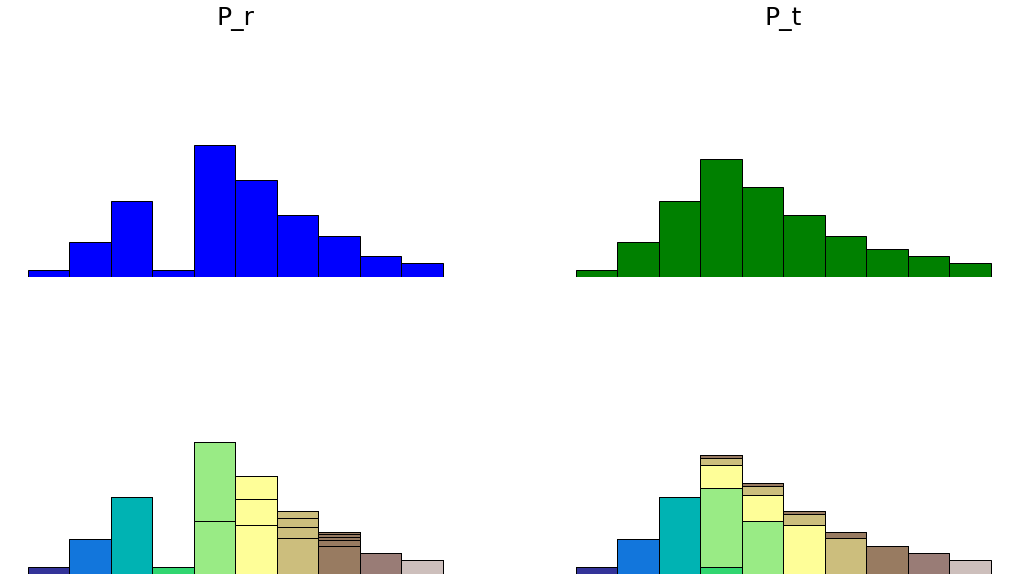

In [11]:
demonstration()

![title](https://sun9-42.userapi.com/c855024/v855024118/19d43e/vZ7mFIY5fjE.jpg)

# <font size="5" > $\textbf{III. Computation and approximation of Wasserstein distance. Special case of time serires}$ </font>

## <font size="4" > $\textbf{III.1. Wasserstein distance computation}$ </font>

We write $\mathcal{W}_p(y_{1:n}, z_{1:m})$ for $\mathcal{W}_p(\hat{\mu}_n, \hat{\nu}_m)$, where $\hat{\mu}_n$ and $\hat{\nu}_m$ stand for the empirical distributions $n^{-1}\sum_{i=1}^{n}\delta_{y_i}$ and $m^{-1}\sum_{i=j}^{m}\delta_{z_j}$.
<br>In particular, the Wasserstein distance between two empirical distributions takes the form

$$\mathcal{W}_p(y_{1:n}, z_{1:m})^p = \inf_{\gamma \in \Gamma_{n,m}} \sum_{i=1}^{n} \sum_{j=1}^{m} \rho(y_i, z_j)^p \gamma_{ij}$$

* $\Gamma_{n,m}$ is the set of $n \times m$ matrices with non-negative entries;
* with columns summing to $m^{-1}$;
* with rows summing to $n^{-1}$.

<br>We consider <b> $n=m$ </b>, for which it is known that the solution to the optimization problem, $\gamma^*$, corresponds to an assignment matrix with only one non-zero entry per row and column, equal to $n^{-1}$.
<br>In this particular case, the Wasserstein distance can thus be represented as 

$$\mathcal{W}_p(y_{1:n}, z_{1:m})^p = \inf_{\delta \in S_n} \frac{1}{n} \sum_{i=1}^{n} \rho(y_i, z_{\delta(i)})^p,$$

* $S_n$ is the set of permutations of $\{1, ..., n\}$;
* $\rho(y_i,z_j) = |y_i - z_j|$ as the observations are univariate.
* <b>The infimum</b> is achived by sorting $y_{1:n}$ and $z_{1:n}$ in increasing order and , <b>mathcing the order statistics</b>.

<br>It turns out that $\mathcal{W}_p(y_{1:n}, z_{1:n})$ is the $p$-Wasserstein distance between the empirical distributions supported on the data sets $y_{1:n}$ and $z_{1:n}$.

<br>From this perspective, our proposal of <b>using the Wasserstein distance between empirical distributions</b> can be thought of as <b>generalizing the use of order statistics within ABC to arbitrary dimensions</b>.

## <font size="4" > $\textbf{III.2. The cost of computing and approximating the Wasserstein distance}$ </font>

>Computing the Wasserstein distance between the empirical distributions $\hat{\mu}_n = \frac{1}{n} \sum_{i=1}^{n}\delta_{yi}$ and $\hat{\nu}_n = \frac{1}{n} \sum_{i=1}^{n}\delta_{zi}$ reduces to a linear sum assignment problem.
- In the univariate case, finding the optimal permutation can be done by sorting the vectors $y_{1:n}$ and $z_{1:n}$ in increasing order, obtaining the orders $\sigma_y(i)$ and $\sigma_z(i)$ for $i \in \{1,...,n\}$. Then, one associates each $y_i$ with $\sigma_z(i)$  where $\sigma(i) = \sigma_z \circ \sigma_y^{-1}(i)$. The cost of the Wasserstein distance computation is thus of order $n \log n$ for distributions on one-dimensional spaces.
-In the multivariate settings,the wasserstein distance computation can be solved by the Hungarian algorithm for a cost of order $n^3$. Other algorithms have a cost of order $n^{2.5} \log (n C_n)$, with $C_n = max_{1\leqq i, j \leqq n} \rho(y_i, z_j)$, and can therefore be more efficient when $C_n$ is small. 
- In our numerical experiments , we use the short-list method presented in Gottschilch and Schuhmacher (2014) and implemented in Schuhmacher et al.(2017). This simplex algorithm-derived method comes without gurantees of polynomial running times, but Gottschlich and Schuhmacher (2014) show empirically that their method tends to have sub-cubic cost.
- The cubic cost of computing Wassertein distances in the multivariate setting can be prohibitive for large data sets. Howerver, many applications of ABC involve relatively small numbers of observations from complex models which are expensive to simulate. In these settings, the cost of simulating synthetic data sets might dominate the model-free cost of computing distances. Note also that the dimension $d_y$ of the observation space only enters the ground distance $\rho$, and thus the cost of computing the Wasserstein distance under a Euclidean ground metric is linear in $d_y$. 

## <font size="4" > $\textbf{III.3. Approximations}$ </font>

### <font size="4" > $\textbf{A. Sinkhorn distance or fast approximations}$ </font>

>In conjunction with its increasing popularity as a tool for inference in statitics and machine learning, there has been a rapid growth in the number of algorithms that approximate the Wasserstein distance at reduced computational costs.

>Consider $\gamma^{\zeta}=\operatorname{argmin}_{\gamma \in \Gamma_{n}} \sum_{i, j=1}^{n} \rho\left(y_{i}, z_{j}\right)^{p} \gamma_{i j}+\zeta \sum_{i, j=1}^{n} \gamma_{i j} \log \gamma_{i j}$, which includes a negative penalty on the entropy of $\gamma$, and define the dual-Sinkhorn divergence $S_{p}^{\zeta}\left(y_{1: n}, z_{1: n}\right)^{p}=\sum_{i, j=1}^{n} \rho\left(y_{i}, z_{j}\right)^{p} \gamma_{i j}^{\zeta}$. The regularized problem can be solved iteratively by Sinkhorn's algorithm, which involves matrix-vector multiplications resulting in a cost of order $n^2$ per iteration.

>If $\zeta → 0$, the dual-Sinkhorn divergence
converges to the Wasserstein distance, whereas if $\zeta → \infty$ it converges to the maximum mean discrepancy. It can therefore be seen as an interpolation between optimal transport
and kernel-based distances.

>Unlike the optimal coupling that yields the exactWasserstein distance, the coupling obtained in the
regularized problem is typically not an assignment matrix.


### <font size="4" > $\textbf{B. Hilbert distance}$ </font>

>The transformations through the Hilbert space-ﬁlling curve and its inverse preserve a notion of distance between probability measures. The Hilbert curve $H : [0, 1] \rightarrow [0, 1]^{d_y}$ is a Hôlder continuous mapping from $[0, 1]$ into $[0, 1]^{d_y}$. Gerber, Chopin and Whitley show that we that define a pseudo-inverse  $h : [0, 1]^{d_y} → [0, 1]$ verifying $h(H(x)) = x$ for all $x ∈ [0,1]$.

>$\mathcal{Y}$ is in $\mathbb{R}^{d_y}$,  to "export" (transform) to in $[0, 1]$ and use the Hilbert curve fitting we will use a certain mapping function which must be continuous and strictly monotone in every component,
$\psi: \mathcal Y \rightarrow [0, 1]^{d_y} $ 

$$\psi(y)=\left(\psi_1(y_1),\psi_2(y_2), ...,\psi_{d_y}(y_{d_y})\right)$$

We can take $\psi$ as the logistic transformation $x\rightarrow \psi(x)=\frac{1}{1+\exp(-x)}$ for example.

Then to compute the hilbert distance we wap the the observations in $(0,1)^{d_y}$ with the function $\psi$ and then can use the pseudo-inverse $h$ presented before to map the precedent result in the unidimensionnal space $(0,1)$. To vizualize this mapping see image below.

![image.png](http://bit-player.org/wp-content/uploads/2013/04/Hilbert-12ths.svg)   

_**Source:**_ *http://bit-player.org/2013/mapping-the-hilbert-curve*

To resume, we have just define $h_{\mathcal{Y}}:=h\circ \psi:\mathcal{Y} \rightarrow (0,1)$.

We have presented before that computing the wassertein distance in the unidemsionnal case(*and when we have same length for the two observations*), can be done by sorting these univariate distributions in increasing order and mapping the observations. So for two distributions vectors $y_{1:n}$ and $z_{1:n}$, denote by $σ_y$ and $σ_z$ the permutations obtained by mapping the vectors through $h_{\mathcal{Y}}$ in increasing order.  

We can understand this as the fact that the close points in $\mathcal{Y}$ will also be in (0,1). Berton. and all define the hilbert distance 
$$\mathfrak{H}_{p}\left(y_{1: n}, z_{1: n}\right)^{p}=\frac{1}{n} \sum_{i=1}^{n} \rho\left(y_{i}, z_{\sigma(i)}\right)^{p} = \frac{1}{n} \sum_{i=1}^{n} \rho\left(y_{\sigma_y(i)}, z_{\sigma_z(i)}\right)^{p}$$.

And this quantity can be seen as approximation of $\mathcal W^p$

### <font size="4" > $\textbf{C. Swapping distance}$ </font>

> Consider an arbitrary permutation $\sigma$ of $\{1,...,n\}$, and the associated transport cost $\sum_{i=1}^n \rho (y_i, z_{\sigma(i)})^p$. The Swapping distance consists of checking, for all $1\leq i < j \leq n$, whether $\rho(y_i, z_{\sigma(i)})^p + \rho(y_j, z_{\sigma(j)})^p$ is less or greater than $\rho(y_i, z_{\sigma(j)})^p + \rho(y_j, z_{\sigma(i)})^p$. If it is greater, then one swaps $\sigma(i)$ and $\sigma(j)$, resulting in a decrease of the transport cost. On can repeat these sweeps over $1\leq i < j \leq n$, until the assignment is left unchanged, and denote it by $\tilde{\sigma}$. Each sweep has a cost of order $n^2$ operations. There is no guarantee that the resulting assignment $\tilde{\sigma}$ corresponds to the optimal one. We refer to the resulting distance $(n^{-1} \sum_{i=1}^n \rho(y_i, z_{\sigma(i)})^p)^{1/p}$ as the swapping distance.


> The swapping distance between $y_{1:n}$ and $z_{1:n}$ takes values that are, by construction, between the Wasserstein distance $\mathcal{W}_p(y_{1:n},z_{1:n})$ and the Hilbert distance $\mathfrak{H}_{p}\left(y_{1: n}, z_{1: n}\right)$. With this property, we show that the associated ABC posterior concentrates on $\theta_*$ as $n$ goes $\infty$ and the threshold $\epsilon$ decreases sufficiently slowly.As with the Hilbert distance, this result is obtained under
the assumption that the model is well-specified and leave further theoretical analysis under milder conditions for future research. In the supplementary material, we also observe that the swapping distance can approximate the Wasserstein distance more accurately than the Hilbert distance as the dimension
$d_y$ grows.

### <font size="4" > $\textbf{D. Subsampling}$ </font>

>Calculating the wasserstein distance increased with the size of $n$(polynomialally, $n^3$ with the Hungarian algorithm). Thus it can be calculated more quickly by sub-sampling first $m < n$ points from $y_{1:n}$ and $z_{1:n}$, then calculating the distance between the samples.  
The problem with this method is that it increases the variance between the calculated distances even if it reduces the calculation time.

## <font size="4" > $\textbf{III.4. Special case of time series}$ </font>

### <font size="4" > $\textbf{Curve matching}$ </font>

> What's time series ? A time series is a series of data points indexed (or listed or graphed) in time order.   
When is it considered that two time-indexed graphs/time series are similar ?
Visually we might say that two time series are similar if their curves are similar. Exemple below

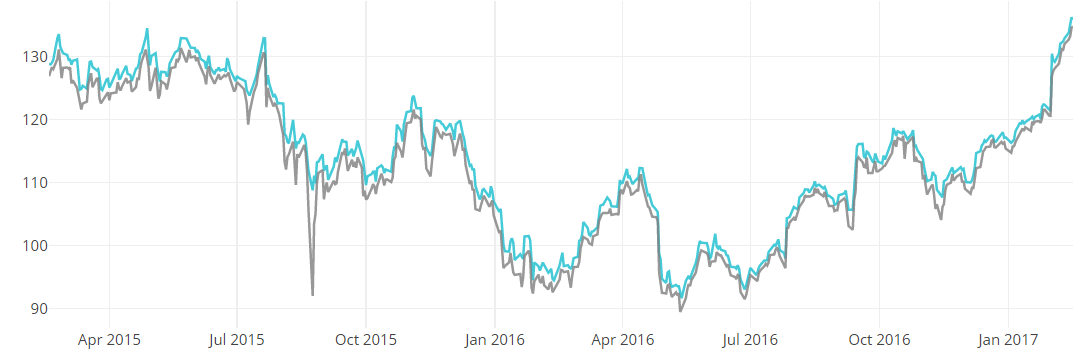

***Source : https://plot.ly/python/v3/time-series/***

> We will rewrite a time serie like $\tilde y_{1:n} = ((t,y_t))_{1:n}$  
To consider the time aspect in time series we have consider a kind of distance which will take this aspect. The authors(Bernton. and al.) consider that distance between a the point $(t,y_t)$ and $(s, z_s)$ can be measured by a weighted distance  $\rho_{\lambda}\left(\left(t, y_{t}\right),\left(s, z_{s}\right)\right)=\left\|y_{t}-z_{s}\right\|+\lambda|t-s|$. We can easily see that this distance take diference between the observed values ($y_t$ and $z_s$) and between time with a parameter of importance $\lambda$

> ***Effect of the factor $\lambda$***  
 - Large value of $\lambda$  
 "Since computing the Wasserstein distance can be thought of as solving an assignment problem, a large value of $λ$ implies that $y_t$ will be assigned to $z_t$, for all $t$".(*Approximate Bayesian computation with the Wasserstein distance*, p. 16).
 - $\lambda \rightarrow 0$  
 If $λ$ goes to zero, the time aspect no longer matters, then  the distance coincides with the Wasserstein distance between the marginal empirical distributions of $y_{1:n}$ and $z_{1:n}$, where the time element is entirely ignored.(*Approximate Bayesian computation with the Wasserstein distance*, p. 16).



# <font size="5" > $\textbf{IV. Numeric applications - Simulations and Comparisons}$ </font>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#@title ***import packages*** {display-mode: "code"}
# Import needed packages

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import inv
from scipy.optimize import linear_sum_assignment
import scipy
from math import *
from matplotlib import rc
from tqdm import tqdm_notebook as tqdm
!pip install POT
import ot
#!pip install abcpmc
np.random.seed(31415)

$\text{Let's define the ABC sampling algorithm with Sequetiel Monte Carlo based on the following algorithm}$

$\underline{\text {ABC SMC algorithm}}$
\begin{array}{l}{} \\ 
{\text {  1: input: a threshold } \epsilon} \\ 
{\text { 2 : output: a weighted sample of particles from } p_{\epsilon}(\theta | x)} \\ {\text { 3 : } t \leftarrow 0}
\\ {\text { 4 :}\text{ repeat }}
\\{\text { 5 : } \quad t \leftarrow t+1}
\\ {\text { 6 :} \quad \text{ determine the next threshold } \epsilon_{t}}
\\ {\text { 7 :} \quad \text{  determine the parameters of the perturbation kernel } K_{t}(\cdot | \cdot)}
\\ {\text { 8 : } \quad i \leftarrow 1}
\\ {\text { 9 : } \quad \text { repeat }}
\\ {\text {10: } \quad \quad \text { if } t=1 \text { then }}
\\ {\text {11: } \quad \quad \quad \text { sample } \tilde{\theta} \text { from } \pi(\theta)} 
\\ {\text {12: } \quad \quad \text { else }} 
\\{\text {13: } \quad \quad \quad \text { sample } \theta \text { from the previous population } \left\{\theta^{(i, t-1)}\right\}_{1 \leq i \leq N} \text { with with weights }\left\{\omega^{(i, t-1)}\right\}_{1 \leq i \leq N}}
\\ {\text {14: } \quad \quad \quad \text { sample } \tilde{\theta} \text { from } K_{t}(\cdot | \theta) \text { and such that } \pi(\tilde{\theta})>0}
\\ {\text{15:} \quad \quad \text { end if }} 
\\ {\text{16:} \quad \quad \text { sample } y \text { from } f(\cdot | \tilde{\theta})} \\ {\text{17:} \quad \quad \text { if } \Delta(y, x) \leq \epsilon_{t} \text { then }} 
\\ {\text{18:} \quad \quad \quad \theta^{(i, t)} \leftarrow \tilde{\theta}} 
\\ {\text{19:} \quad \quad \quad {y^{(i, t)} \leftarrow y} 
\\ {\text {20: } \quad \quad \quad i \leftarrow i+1}}
\\ {\text {21: } \quad \quad \text { end if }}
\\{\text {22:} \quad \text{ until } i=N+1} 
\\ {\text {23:} \quad \text{ calculate the weights: for all } 1 \leq i \leq N} 
\\ {\text {24: } \quad \text{if } t \neq 1 \text { then }\\
\quad \quad \quad \omega^{(i, t)} \leftarrow \frac{\pi\left(\theta^{(i, t)}\right)}{\sum_{j=1}^{n} \omega^{(j, t-1)} K_{t}\left(\theta^{(i, t)} | \theta^{(j, t-1)}\right)}}
\\{\text{25:} \quad \text { else } \omega^{(i, 1)} \leftarrow 1} 
\\ {\text{26:} \quad \text { end if }} 
\\ {\text{27:} \quad \text { normalize the weights }} 
\\ {\text{28:}  \text { until } \epsilon_{t} \leq \epsilon} 
\\ {\text{29: } T \leftarrow t}
\end{array}

***Source***: ***On optimality of kernels for approximate Bayesian computation using sequential Monte Carlo***,p.4,arXiv:1106.6280v4  [stat.CO]  15 Oct 2012, Sarah Filippi , Chris P. Barnes , Julien Cornebise, Michael P.H. Stumpf


In [0]:
#Sequential Monte Carlo (with kernel: gaussian perturbation)

def SMC(y_true, y_sampler, prior,dim_theta, distance , n_samples , T = 5, alpha = 1.):
    ''' 
    Inputs
    -------------
    y_true : Observations (y observed)
    y_sampler: function which takes two parameters theta at first and length
    prior: class
    distance: distance to use for ABC
    n_samples: number of particles
    T: number of steps
    alpha: the percentage of particles to be kept after each step
    ---------------
    Outputs:
    theta_list : np.array(), last n_samples sampled particles
    theta_history: np.array(), all sampled parameters 
    theta_accepted_history: np.array(), all sampled accepted at each steps
    list_epsilon: np.array(), distance between y_true and y_hat generated for all accepted samples, at each steps
    --------------
    '''
    # fisrt sample
    theta_list = prior.random(n_samples)
    length = len(y_true)
    # take the dimension d_y
    dim = int(np.array(y_true).flatten().shape[0]/np.array(y_true).shape[0])
    totalcost=n_samples
    theta_history=[]
    theta_accepted_history=[]
    list_epsilon = []
    pbar=[]
    for t in range(T):
        if t == 0:
              list_y_hat = []
              for theta in theta_list:
                  list_y_hat.append(y_sampler(theta,length))
              list_distance = []
              for y_hat in list_y_hat:
                  list_distance.append(distance(y_hat,y_true))
              new_weights = np.ones(n_samples)/n_samples
              print("Phase t= "+str(t)+" done - epsilon = infinity\n-------------------------")
        else : 
              nb_accepted = 0
              theta_old = theta_list
              theta_list = []
              old_weights = new_weights
              new_weights = []
              #normalize weights
              old_weights /=np.sum(old_weights)
              # change epsilon as epsilon order alpha of last computed distance
              epsilon = np.quantile(list_distance, alpha)
              loop = 0
              print("Phase t= "+str(t))
              pbar.append(tqdm(total=n_samples))
              while nb_accepted < n_samples: # we continue while we haven't n_samples accepted
                  list_distance=[]
                  choosed =  np.random.choice(n_samples,1, p = list(old_weights))[0]

                  #Simulate some theta according to the gaussian kernel
                  #i choose the optimal parameters of the kernel according to
                  #"On optimality of kernels for approximate Bayesian computation using sequential Monte Carlo", arXiv:1106.6280v4  [stat.CO]  15 Oct 2012
                  var_theta = np.var(theta_old,axis=0)
                  kernel_perturbation = gaussian(theta_old[choosed],var_theta*np.eye(dim_theta))
                  theta = kernel_perturbation.random(1)[0]
                  y_hat = y_sampler(theta,length)
                  # calculate the distance between y_true et y_hat simulated
                  d = distance(y_true,y_hat)
                  
                  loop +=1
                  if d < epsilon:
                      pbar[t-1].update(1)
                      nb_accepted+=1
                      theta_list.append(theta.tolist())
                      w = prior.pdf(theta)/np.sum(old_weights*kernel_perturbation.pdf(theta))
                      new_weights.append(w)
                      list_distance.append(d)
                      list_epsilon.append(d)
                      theta_accepted_history.append(theta)
              pbar[t-1].close()
              totalcost+=loop
              print("epsilon = "+str(round(epsilon,3))+" - acceptance rate = "+str(round(n_samples/loop*100,2))+"%"+"\n----------------------------")
    print("Total cost = "+str(totalcost)+"\n----------------------------")
    new_weights /=np.sum(new_weights) 
    return np.array(theta_list),np.array(new_weights), np.array(theta_history),np.array(theta_accepted_history), np.array(list_epsilon)

Let's define distances:
 - Wasserstein
 - Euclidian
 - based on Summary


Computing the wasserstein distance with the Hungarian algorithm can take several seconds, so we also define a quick approximation of the wasserstein distance using the POT package. It also has a complexity of $\mathcal O(n^3)$ but the solver is quite efficient and uses sparsity of the solution.  
***About hungarian algorithm: https://en.wikipedia.org/wiki/Hungarian_algorithm***  
***About POT package: https://pot.readthedocs.io/en/stable/quickstart.html#optimal-transport-and-wasserstein-distance***

In [0]:
#@title <font size="3">*defining wasserstein distance*</font> {display-mode:"code"}
# Define distances
# 1 # p-Wasserstein
def wasserstein(p):
    """
    Inputs
    -----------
    p: order of the wasserstein distance

    Outputs
    -----------
    distance: function which return p-wasserstein distance between two sets
    """
    try:
        if p > 0:
            def distance(u_values, v_values):
                """
                Inputs
                ---------
                u_values: dataset, type array or list, shape = (n,.)
                v_values: dataset, type array or list, shape = (n,.)

                Outputs
                ---------
                dist: scalar, value of distance
                """

                if np.array(u_values)[0].shape!=():
                    M  = np.power(ot.dist(u_values, v_values, metric='euclidean'),p)
                else:
                    M =np.zeros((len(u_values), len(v_values)))
                    for i in range(len(u_values)):
                        for j in range(len(v_values)):
                            M[i,j] = np.abs(u_values[i]-v_values[j])
                    M = np.power(M,p)

                M = 1/sqrt(len(u_values)*len(v_values))*M
                # Hunguriann Algorithm
                row_ind, col_ind = linear_sum_assignment(M)
                dist = np.power(M[row_ind, col_ind].sum(),1/p)
                return dist
    except:
        print("p must be positive")
    return distance

def fast_wasserstein(p):
    """
    Inputs
    -----------
    p: order of the wasserstein distance

    Outputs
    -----------
    distance: function which return p-wasserstein distance between two sets
    """
    try:
        if p > 0:
            def distance(u_values, v_values):
                """
                Inputs
                ---------
                u_values: dataset, type array or list, shape = (n,.)
                v_values: dataset, type array or list, shape = (n,.)

                Outputs
                ---------
                dist: scalar, value of distance
                """
                a, b = ot.unif(len(u_values)), ot.unif(len(v_values))
                if np.array(u_values)[0].shape!=():
                    M  = np.power(ot.dist(u_values, v_values, metric='euclidean'),p)
                else:
                    M =np.zeros((len(u_values), len(v_values)))
                    for i in range(len(u_values)):
                        for j in range(len(v_values)):
                            M[i,j] = np.abs(u_values[i]-v_values[j])
                    M = np.power(M,p)

                dist = np.power(ot.emd2(a,b,M),1/p)
                return dist
    except:
        print("p must be positive")
    return distance

In [0]:
#@title <font size="3">*defining euclidean distance and mean_summary distance*</font> {display-mode:"code"}
# 2 # Euclidean distance
def euclidean(u_values, v_values):
    """
    Inputs:
    --------
    u_values:
    v_values:

    Outputs:
    ---------
    """
    diff = np.array(u_values) - np.array(v_values)
    return  np.mean(np.linalg.norm(diff,axis=1))

# 3 # Mean Summary distance
def mean_summary(u_values, v_values):
    """
    Inputs:
    --------
    u_values:
    v_values:

    Outputs:
    ---------
    """
    u_values = np.array(u_values)
    v_values = np.array(v_values)
    return np.linalg.norm(np.mean(u_values,axis=0) - np.mean(v_values,axis=0))


## <font size="4" > $\textbf{IV.1. Illustration on a Normal model}$ </font>


Consider $n=100$ i.i.d. observations generated from a bivariate Normal distribution. The mean components are drawn from a standard Normal distribution and the generated values are approximately $−0.71$ and $0.09$.
The covariance is equal to 1 on the diagonal and $0.5$ off the diagonal. The parameter $\theta = (\theta_1,\theta_2)$ is the mean vector, and is assigned a centered Normal prior with variance 25 on each component, $\mu_{prior}=(0,0)$ $\Sigma_{prior}=\begin{pmatrix} 25 & 0 \\ 0 & 25 \end{pmatrix}$ .

In [0]:
#@title <font size="3"> *defining sampler* </font> {display-mode:"code"}

# Define a class gaussian will permit permit us to sample from a normal
# distribution and to calculate pdf
class gaussian():
    def __init__(self, mu, sigma, multi = False ):
        self.mu = np.array(mu)
        self.sigma = np.array(sigma)
    def random(self, n_samples):
        if self.mu.shape!=():
            theta = np.random.multivariate_normal(self.mu, self.sigma, n_samples)
        else:
            theta = np.random.normal(self.mu, self.sigma, n_samples)
        return theta
    def pdf(self, x):
        proba = scipy.stats.multivariate_normal.pdf(x, self.mu, self.sigma)
        return proba


def gaussian_sampler(mu = None, sigma = None, multi = False):
    if multi:
        if ((mu is None)  & (sigma is None)):
            def sampler(theta, length):
                y = np.random.multivariate_normal(theta[0], theta[1], length)
                return y
        elif mu is None:
            def sampler(theta, length):
                y = np.random.multivariate_normal(theta, sigma, length)
                return y
        elif sigma is None:
            def sampler(theta, length):
                y = np.random.multivariate_normal(mu, theta, length)
                return y
    else:
        if ((mu is None) & (sigma is None)):
            def sampler(theta, length):
                y = np.random.normal(theta[0], theta[1], length)
                return y
        elif mu is None:
            def sampler(theta, length):
                y = np.random.normal(theta, sigma, length)
                return y
        elif sigma is None:
            def sampler(theta, length):
                y = np.random.normal(mu, theta, length)
                return y
    return sampler

In [0]:
#@title <font size="3">*setting parameters and generating data*</font> {display-mode:"code"}
# Define true parameters and generate data
n = 100
mu_true = [-0.71, 0.09]
sigma_true = [[1, 0.5],[0.5,1]]
y_true = np.random.multivariate_normal(mu_true, sigma_true, n)

# Define prior parameters
mu_prior = [0,0]
sigma_prior = [[25, 0],[0, 25]]

# Define prior et y sampler
n_samples = 150
p = 2
prior = gaussian(mu=mu_prior, sigma=sigma_prior, multi=True)
y_sampler = gaussian_sampler(mu=None, sigma=sigma_true, multi=True)

In [25]:
T = 10

print("Wasserstein ABC SMC starting...")
wasserstein_theta, wasserstein_theta_wgts ,_,wtheta_history,w_dist= SMC(y_true=y_true, y_sampler=y_sampler, prior=prior, dim_theta=2, distance=fast_wasserstein(p), n_samples=n_samples , T=T, alpha=0.75)

print("\nEuclidian ABC SMC starting...")
euclidean_theta,euclidean_theta_wgts ,_,etheta_history,e_dist= SMC(y_true=y_true, y_sampler=y_sampler, prior=prior, dim_theta=2, distance = euclidean,n_samples = n_samples , T =T,alpha=0.75)

print("\nSummary ABC SMC starting...")
summary_theta,summary_theta_wgts, _, stheta_history, s_dist = SMC(y_true=y_true, y_sampler=y_sampler, prior=prior, dim_theta=2, distance = mean_summary, n_samples = n_samples , T=T, alpha=0.75)

Wasserstein ABC SMC starting...
Phase t= 0 done - epsilon = infinity
-------------------------
Phase t= 1


epsilon = 8.64 - acceptance rate = 52.82%
----------------------------
Phase t= 2


epsilon = 7.505 - acceptance rate = 55.97%
----------------------------
Phase t= 3


epsilon = 2.29 - acceptance rate = 9.97%
----------------------------
Phase t= 4


epsilon = 1.981 - acceptance rate = 48.23%
----------------------------
Phase t= 5


epsilon = 1.204 - acceptance rate = 28.52%
----------------------------
Phase t= 6


epsilon = 1.057 - acceptance rate = 48.23%
----------------------------
Phase t= 7


epsilon = 0.521 - acceptance rate = 11.18%
----------------------------
Phase t= 8


epsilon = 0.403 - acceptance rate = 8.75%
----------------------------
Phase t= 9


epsilon = 0.329 - acceptance rate = 0.25%
----------------------------
Total cost = 65780
----------------------------

Euclidian ABC SMC starting...
Phase t= 0 done - epsilon = infinity
-------------------------
Phase t= 1


epsilon = 8.182 - acceptance rate = 51.19%
----------------------------
Phase t= 2


epsilon = 8.149 - acceptance rate = 63.29%
----------------------------
Phase t= 3


epsilon = 4.691 - acceptance rate = 32.47%
----------------------------
Phase t= 4


epsilon = 3.186 - acceptance rate = 32.82%
----------------------------
Phase t= 5


epsilon = 2.35 - acceptance rate = 33.33%
----------------------------
Phase t= 6


epsilon = 2.319 - acceptance rate = 58.82%
----------------------------
Phase t= 7


epsilon = 1.83 - acceptance rate = 17.94%
----------------------------
Phase t= 8


epsilon = 1.551 - acceptance rate = 0.66%
----------------------------
Phase t= 9


epsilon = 1.521 - acceptance rate = 0.97%
----------------------------
Total cost = 41282
----------------------------

Summary ABC SMC starting...
Phase t= 0 done - epsilon = infinity
-------------------------
Phase t= 1


epsilon = 8.595 - acceptance rate = 51.55%
----------------------------
Phase t= 2


epsilon = 5.666 - acceptance rate = 35.46%
----------------------------
Phase t= 3


epsilon = 2.5 - acceptance rate = 18.38%
----------------------------
Phase t= 4


epsilon = 1.378 - acceptance rate = 25.25%
----------------------------
Phase t= 5


epsilon = 0.767 - acceptance rate = 26.98%
----------------------------
Phase t= 6


epsilon = 0.763 - acceptance rate = 56.18%
----------------------------
Phase t= 7


epsilon = 0.634 - acceptance rate = 47.62%
----------------------------
Phase t= 8


epsilon = 0.211 - acceptance rate = 9.25%
----------------------------
Phase t= 9


epsilon = 0.172 - acceptance rate = 27.99%
----------------------------
Total cost = 5569
----------------------------


Let's derive the posterior


$ \theta \sim \mathcal N( \mu,  \Sigma)$  
$\mathcal y_i |  \theta \sim \mathcal N(\theta ,   \Sigma)$

$$p(\theta|  y_{1:N}) \propto  p(\theta) \prod_{i=1}^N p( y_i | \theta)$$

$$
\begin{align}
\log p(\theta| y_{1:N}) &= -\frac{1}{2}\sum_{i=1}^N( y_i - \theta)' \Sigma^{-1}( y_i - \theta) -\frac{1}{2}(\theta - \mu)' \Sigma_{prior}^{-1}(\theta - \mu) + const\\ 
&=-\frac{1}{2} N \theta'  \Sigma^{-1} \theta + \sum_{i=1}^N \theta'  \Sigma^{-1}   y_i -\frac{1}{2} \theta'  \Sigma_{prior}^{-1} \theta + \theta'  \Sigma_{prior}^{-1} \mu + const\\
&= -\frac{1}{2} \theta' (N  \Sigma^{-1} +  \Sigma_{prior}^{-1}) \theta + \theta' ( \Sigma_{prior}^{-1} \mu +  \Sigma^{-1} \sum_{i=1}^N  y_i) + const\\
&= -\frac{1}{2}(\theta - (N  \Sigma^{-1} +  \Sigma_{prior}^{-1})^{-1}( \Sigma_{prior}^{-1} \mu +  \Sigma^{-1} \sum_{i=1}^N  y_i))' (N  \Sigma^{-1} +  \Sigma_{prior}^{-1}) (\theta - (N  \Sigma^{-1} +  \Sigma_{prior}^{-1})^{-1}( \Sigma_{prior}^{-1} \mu +  \Sigma^{-1} \sum_{i=1}^N  y_i)) + const \end{align}$$

$\theta|  y_{1:N}\sim \mathcal N\left((N  \Sigma^{-1} +  \Sigma_{prior}^{-1})^{-1}( \Sigma_{prior}^{-1} \mu +  \Sigma^{-1} \sum_{i=1}^N  y_i), (N  \Sigma^{-1} +  \Sigma_{prior}^{-1})^{-1}\right)
$

Using woodbury identity  
$\left(N  \Sigma^{-1} +  \Sigma_{prior}^{-1}\right)^{-1} =  \Sigma\left(\frac{1}{N}  \Sigma +  \Sigma_{prior}\right)^{-1} \frac{1}{N}  \Sigma_{prior}$

And using this for the mean 
$$ \Sigma\left(\frac{1}{N}  \Sigma +  \Sigma_{prior}\right)^{-1} \frac{1}{N}  \Sigma_{prior}  \Sigma_{prior}^{-1} \mu +  
\frac{1}{N}  \Sigma_{prior}\left(\frac{1}{N}  \Sigma +  \Sigma_{prior}\right)^{-1}   \Sigma  \Sigma^{-1} \sum_{i=1}^N  y_i \\=  \Sigma\left(\frac{1}{N}  \Sigma +  \Sigma_{prior}\right)^{-1} \frac{1}{N} \mu 
+  \Sigma_{prior}\left(\frac{1}{N}  \Sigma +  \Sigma_{prior}\right)^{-1} \sum_{i=1}^N \left(\frac{1}{N}  y_i\right)$$

*https://stats.stackexchange.com/questions/28744/multivariate-normal-posterior*

In [0]:
sigma_true = np.array(sigma_true)
sigma_prior = np.array(sigma_prior)
sigma_posterior = 1/n*sigma_true@inv(1/n*sigma_true+sigma_prior)@sigma_prior
mu_posterior = (1/n*sigma_true@inv(1/n*sigma_true+sigma_prior))@mu_prior+ sigma_prior@inv(1/n*sigma_true+sigma_prior)@np.mean(y_true, axis=0)
posterior_theta = np.random.multivariate_normal(mu_posterior, sigma_posterior, n_samples)

In [27]:
#@title <font size=3>*evaluate distance to posterior*</font> {display-mode: "code"}
# Compute distance to posterior
wstep = int(np.floor(len(wtheta_history)/n_samples))
estep = int(np.floor(len(etheta_history)/n_samples))
sstep = int(np.floor(len(stheta_history)/n_samples))

wasserstein_toposterior = []
euclidean_toposterior = []
summary_toposterior = []

for j in range(wstep):
    k = j*n_samples
    wasserstein_toposterior.append([wasserstein(1)(wtheta_history[k:k+n_samples],posterior_theta),k])
print("wasserstein_toposterior is done")
for j in range(estep):
    k = j*n_samples
    euclidean_toposterior.append([wasserstein(1)(etheta_history[k:k+n_samples],posterior_theta),k])
print("euclidean_toposterior is done")
for j in range(sstep):
    k = j*n_samples
    summary_toposterior.append([wasserstein(1)(stheta_history[k:k+n_samples],posterior_theta),k])
print("summary_toposterior is done")

wasserstein_toposterior = np.array(wasserstein_toposterior)
euclidean_toposterior = np.array(euclidean_toposterior)
summary_toposterior = np.array(summary_toposterior)

wasserstein_toposterior is done
euclidean_toposterior is done
summary_toposterior is done


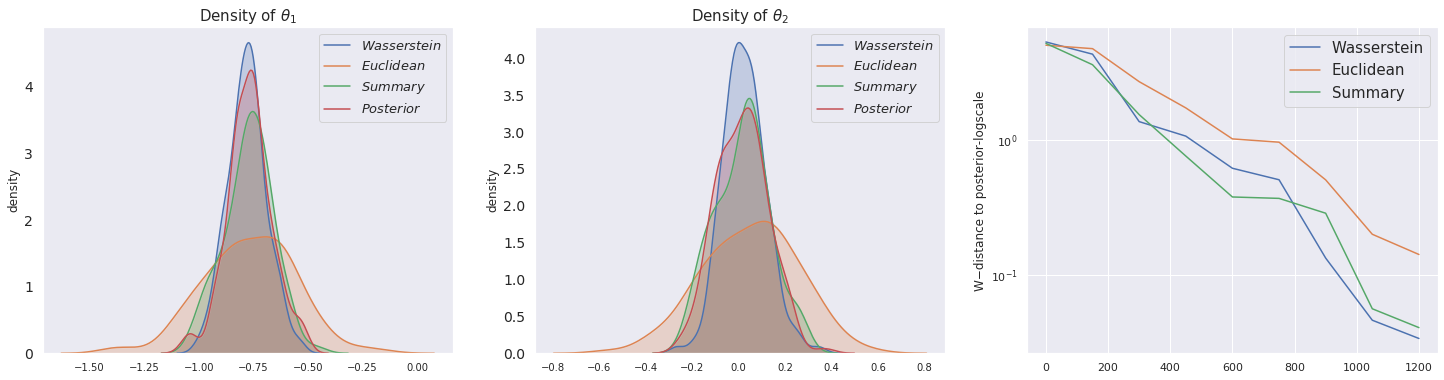

In [28]:
#@title <font size=3>*plotting mvnormal posterior marginal* {display-mode: "code"}
sns.set(color_codes=True)
plt.figure(figsize=(25,6))
#--------
plt.subplot(1,3,1)
plt.xticks(fontsize='10')
plt.yticks(fontsize='14')
sns.kdeplot(wasserstein_theta[:,0],shade=True, label=r"$Wasserstein$")
sns.kdeplot(euclidean_theta[:,0], shade=True, label=r"$Euclidean$")
sns.kdeplot(summary_theta[:,0], shade=True, label=r"$Summary$")
sns.kdeplot(posterior_theta[:,0], shade=True, label=r"$Posterior$")
plt.title(r'Density of $\theta_1$',fontsize='15')
plt.ylabel("density")

plt.grid()
plt.legend(prop={'size':13})
#------
plt.subplot(1,3,2)
plt.xticks(fontsize='10')
plt.yticks(fontsize='14')
sns.kdeplot(wasserstein_theta[:,1], shade=True, label=r"$Wasserstein$")
sns.kdeplot(euclidean_theta[:,1], shade=True, label=r"$Euclidean$")
sns.kdeplot(summary_theta[:,1], shade=True, label=r"$Summary$")
sns.kdeplot(posterior_theta[:,1], shade=True, label=r"$Posterior$")
plt.title(r'Density of $\theta_2$', fontsize='15')
plt.ylabel("density")
plt.grid()
plt.legend(prop={'size':13})
#-------------
plt.subplot(1,3,3)
nmax = min(min(wstep,estep),sstep)
plt.plot(wasserstein_toposterior[0:nmax][:,1],wasserstein_toposterior[0:nmax][:,0], label="Wasserstein")
plt.plot(euclidean_toposterior[0:nmax][:,1],euclidean_toposterior[0:nmax][:,0], label="Euclidean")
plt.plot(summary_toposterior[0:nmax][:,1],summary_toposterior[0:nmax][:,0], label="Summary")
plt.yscale("log")
plt.ylabel("W−distance to posterior-logscale")
plt.legend(prop={'size':15})
plt.show()

**Comments**:  
The first two figures approximate the marginal posterior distribution. They show that the wasserstein estimates the law more precisely the marginal posteriors than other.

To quantify the difference between the obtained ABC samples and the posterior, we will again use the Wasserstein distance to calculate the distance between the distributions. More precisely, we independently take a sample of the posterior distribution and calculate the Wasserstein distance between these samples and the ABC samples produced by the SMC algorithm at each stage of the SMC.
We note here that the more stages in the SMC, the more the wasserstein produces a distribution closer to the posterior compared to other distances.

<Figure size 1800x432 with 0 Axes>

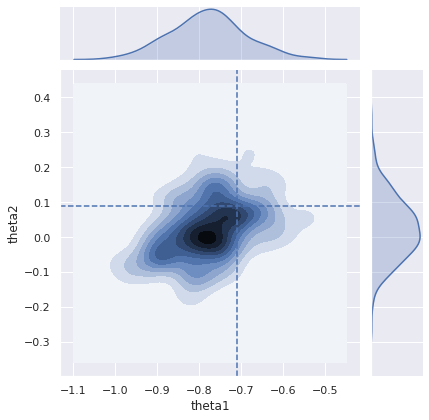

In [29]:
# plot joint density(estimated by kernel density)
df = pd.DataFrame(wasserstein_theta,columns=['theta1','theta2'])
plt.figure(figsize=(25,6))
plot = sns.jointplot(x="theta1", y="theta2", data=df, kind="kde");
axis_minx, axis_maxx,axis_miny,axis_maxy= plt.axis()
#plt.vlines(x=mu_true[1],ymin=axis_miny,ymax=axis_maxy)
plot.ax_joint.axvline(mu_true[0],linestyle='--')
plot.ax_joint.axhline(mu_true[1],linestyle='--')
plt.show()

## <font size="4" > $\textbf{IV.2. Examples on time series}$ </font>

### <font size="4" > $\textbf{Example using curve matching: } y_t=A \cos(2\pi \omega t+\phi) +\sigma w_t$ </font>

$y_t=A \cos(2\pi \omega t+\phi) +\sigma w_t$ where $w_t$ is gaussian noise ( $w_{t} \sim \mathcal{N}(0,1)$).

The unkwonn paramaters are $A$, $\omega$, $\phi$ and $\sigma$.

The data are generated using $ω = 1/80$, $\phi = π/4$, $\log(σ) = 0$ and $\log(A) = \log(2)$, with $n = 100$.  
The prior distributions are uniform on $[0, 1/10]$ and $[0, 2π]$ for $ω$ and $\phi$ respectively, and standard Normal on $\log(σ)$ and $\log(A)$.
We can notice that $y_t|{(A,\omega,\phi,\sigma)} \sim \mathcal{N}(Acos(2\pi \omega t+\phi), \sigma)$

In [0]:
#setting true parameters and generating data
time_length=500
logA_true= np.log(2)
logsigma_true = 0
omega_true = 1/80
phi_true = pi/4

cosine_y_true= [[t,np.exp(logA_true)*np.cos(2*pi*omega_true*t+phi_true)+ np.exp(logsigma_true)*np.random.normal(0,1)] for t in np.arange(time_length)+1]

In [0]:
# define curve matching distance
def curve_matching(p, lmbd):
    """
    Inputs:
    -------------
    p:
    lmbd: parameter of temporal importance
    Outputs:
    distance: function that returns curve matching distance of two time series
    -------------
    """
    def distance(u, v):
        """
        Inputs:
        --------------
        u: ndarray - dimension (n,2). The second dimension contains time indexing
        v: ndarray - dimension (n,2). The second dimension contains time indexing
        Outputs:
        dist: scalar - curve matching distance between two time series
        ----------------
        """
        u = np.array(u)
        v = np.array(v)
        v_time = np.array([np.repeat(v.T[0][i], len(v)).tolist() for i in range(len(v))])
        u_time = np.array([np.repeat(u.T[0][i], len(u)).tolist() for i in range(len(u))])

        v_time = v_time.T
        diff_time = lmbd*np.abs(u_time-v_time)

        u_values = np.array([np.repeat(u.T[1][i], len(u)).tolist() for i in range(len(u))])
        v_values = np.array([np.repeat(v.T[1][i], len(v)).tolist() for i in range(len(v))])

        diff_mat = np.abs(u_values-v_values.T)

        a, b = ot.unif(len(u_values)), ot.unif(len(u_values))
        M  = np.power(diff_mat+ diff_time,p)
        dist = np.power(ot.emd2(a,b,M),1/p)
        return dist
    
    return distance
# euclidean distance for time series yt_tilde = (t,yt)
def cosine_euclidean(u,v):
    """
    inputs
    ---------------
    u: ndarray - dimension (n,2). The second dimension contains time indexing
    v: ndarray - dimension (n,2). The second dimension contains time indexing

    output:
    ---------------
    dist: euclidean distance between u and v
    """
    u_values = np.array(u).T[1]
    v_values = np.array(v).T[1]
    dist = np.sum(np.abs(u_values-v_values))
    return dist


In [0]:
class cosine_prior():
    def random(n_samples):
        logA = np.random.normal(0,1,n_samples)
        A = np.exp(logA)
        logsigma = np.random.normal(0,1,n_samples)
        sigma = np.exp(logsigma)
        omega = np.random.uniform(0,1/10,size=n_samples)
        phi = np.random.uniform(0, 2*pi, size=n_samples)
        theta = [[logA[i],omega[i],phi[i],logsigma[i]] for i in range(n_samples)]
        return theta
    def pdf(x):
        pdf_logA = scipy.stats.norm.pdf(x[0],0,1)
        pdf_omega = scipy.stats.uniform.pdf(x[1],0,1/10)
        pdf_phi = scipy.stats.uniform.pdf(x[2],0,2*pi)
        pdf_logsigma  = scipy.stats.norm.pdf(x[3],0,1)
        
        proba = pdf_logA*pdf_omega*pdf_phi*pdf_logsigma
        return proba

def cosine_sampler(x,length):
    y = [[t,np.exp(x[0])*np.cos(2*pi*x[1]*t+x[2])+ np.exp(x[3])*np.random.normal(0,1)] for t in np.arange(length)+1]
    return y
    
def cosine_likelihood(ys):
    """
    inputs
    --------------
    """
    ys = np.array(ys)
    def logp(x):
        mean = np.exp(x[0])*np.cos(2*pi*x[1]*ys.T[0]+x[2])
        sigma = np.exp(x[3])
        logdensities = scipy.stats.norm.logpdf(ys.T[1],mean,sigma)
        likelihood = np.sum(logdensities)
        
        return -likelihood
        
    return logp

Let's execute the smc abc with curve matching distance on our example.

In [64]:
curve_match_theta,_,_,cm_theta_accep_history, cosine_epsilon= SMC(y_true=cosine_y_true, y_sampler=cosine_sampler, prior=cosine_prior, dim_theta=4, distance=curve_matching(2,2), n_samples=500,T=5 ,alpha=0.75)

Phase t= 0 done - epsilon = infinity
-------------------------
Phase t= 1


epsilon = 3.488 - acceptance rate = 63.45%
----------------------------
Phase t= 2


epsilon = 1.842 - acceptance rate = 14.82%
----------------------------
Phase t= 3


epsilon = 1.758 - acceptance rate = 3.36%
----------------------------
Phase t= 4


epsilon = 1.75 - acceptance rate = 1.05%
----------------------------
Total cost = 67159
----------------------------


In [65]:
euclidean_cos_theta,_,_ ,_,_= SMC(y_true = cosine_y_true, y_sampler=cosine_sampler, prior=cosine_prior, dim_theta=4, distance=cosine_euclidean, n_samples=500,T=5, alpha=0.75)

Phase t= 0 done - epsilon = infinity
-------------------------
Phase t= 1


epsilon = 1385.256 - acceptance rate = 61.73%
----------------------------
Phase t= 2


epsilon = 916.713 - acceptance rate = 45.45%
----------------------------
Phase t= 3


epsilon = 767.923 - acceptance rate = 28.3%
----------------------------
Phase t= 4


epsilon = 759.595 - acceptance rate = 49.36%
----------------------------
Total cost = 5190
----------------------------


Derive the posterior in this case is complicated. So let's estimate the posterior via Metropolis Hasting

In [0]:
#@title <font size=3> *metropolis hastings*
# lab session mh_mala_hmc M2DS Polytechnique, Randa Douc and Sylvain LeCorff
def HM_monte_carlo(n_samples, log_prob, initial_state, step_size = 0.1):
    """
    Inputs
    ----------
    n_samples: number of samples to return
    log_prob: opposite of the loglikelihood to sample from
    initial_state: initial sample
    step_size: standard deviation of the proposed moves
    
    Outputs
    -------
    samples: samples from the MCMC algorithm
    accepted: array of 0 and 1 to display which proposed moves have been accepted
    """
    initial_state = np.array(initial_state)
    
    samples  = [initial_state]
    accepted = []

    size = (n_samples,) + initial_state.shape[:1]
    
    # random variable to sample proposed moves
    epsilon = scipy.stats.norm(0, 1).rvs(size)
    
    pbar = tqdm(total=n_samples)
    for noise in epsilon:
        
        q_new = samples[-1] + step_size*noise
       
        # acceptance rate
        old_log_p = log_prob(samples[-1]) 
        new_log_p = log_prob(q_new) 
        
        pbar.update(1)
        if np.log(np.random.rand()) < old_log_p - new_log_p:
            samples.append(q_new)
            accepted.append(True)
        else:
            samples.append(np.copy(samples[-1]))
            accepted.append(False)
    pbar.close()
    return (np.array(samples[1:]),np.array(accepted),)

In [60]:
print("estimate posterior with HM")

cosine_thetas_posterior,cosine_accepted = HM_monte_carlo(n_samples=50000, log_prob=cosine_likelihood(cosine_y_true), initial_state = curve_match_theta[-1],step_size = 0.01)

estimate posterior with HM


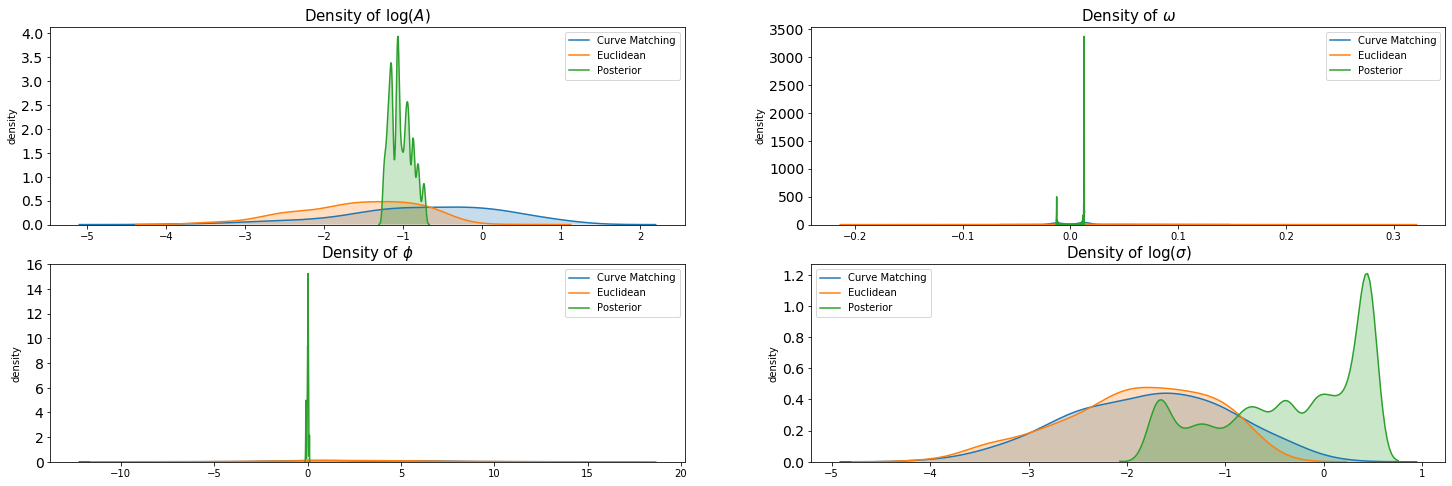

In [66]:
#@title <font size=3>*plotting marginal posterior density* {display-mode: "code"}
plt.figure(figsize=(25,8))
params = ["$\log(A)$","$\omega$","$\phi$","$\log(\sigma)$" ]
#--------
for i,text in enumerate(params):
    plt.subplot(2,2,i+1)
    plt.xticks(fontsize='10')
    plt.yticks(fontsize='14')
    sns.kdeplot(curve_match_theta[:,i], shade=True, label=r"Curve Matching")
    sns.kdeplot(euclidean_cos_theta[:,i], shade=True, label=r"Euclidean")
    sns.kdeplot(cosine_thetas_posterior[10000:50000,i], shade=True, label=r"Posterior")
    plt.title(r'Density of '+text,fontsize='15')
    plt.ylabel("density")
plt.show()

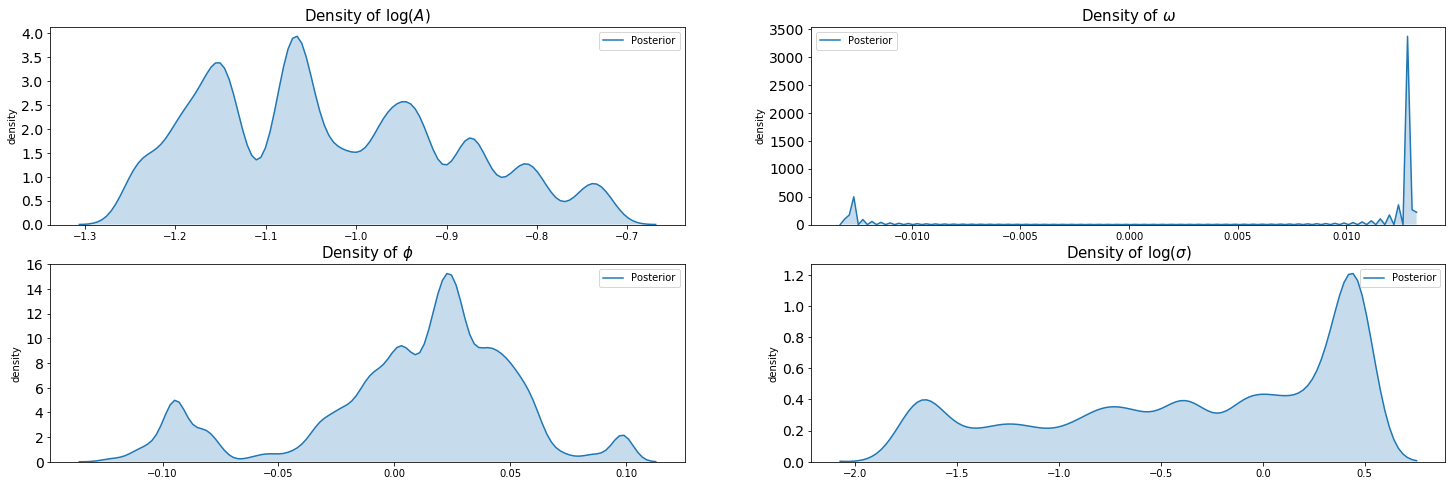

In [62]:
#@title <font size=3>*plotting marginal posterior density* {display-mode: "code"}
plt.figure(figsize=(25,8))
params = ["$\log(A)$","$\omega$","$\phi$","$\log(\sigma)$" ]
#--------
for i,text in enumerate(params):
    plt.subplot(2,2,i+1)
    plt.xticks(fontsize='10')
    plt.yticks(fontsize='14')
    #sns.kdeplot(curve_match_theta[:,i], shade=True, label=r"Curve Matching")
    #sns.kdeplot(euclidean_cos_theta[:,i], shade=True, label=r"Euclidean")
    sns.kdeplot(cosine_thetas_posterior[10000:50000,i], shade=True, label=r"Posterior")
    plt.title(r'Density of '+text,fontsize='15')
    plt.ylabel("density")
plt.show()

**Comments:**  
In any case, either with a bad estimation of the posterior. And the curve matching distance is in none of the situations better than Euclidean distance.

***Concentration around data genrating parameters***

Here we try to see if we really have a concentration around the real values

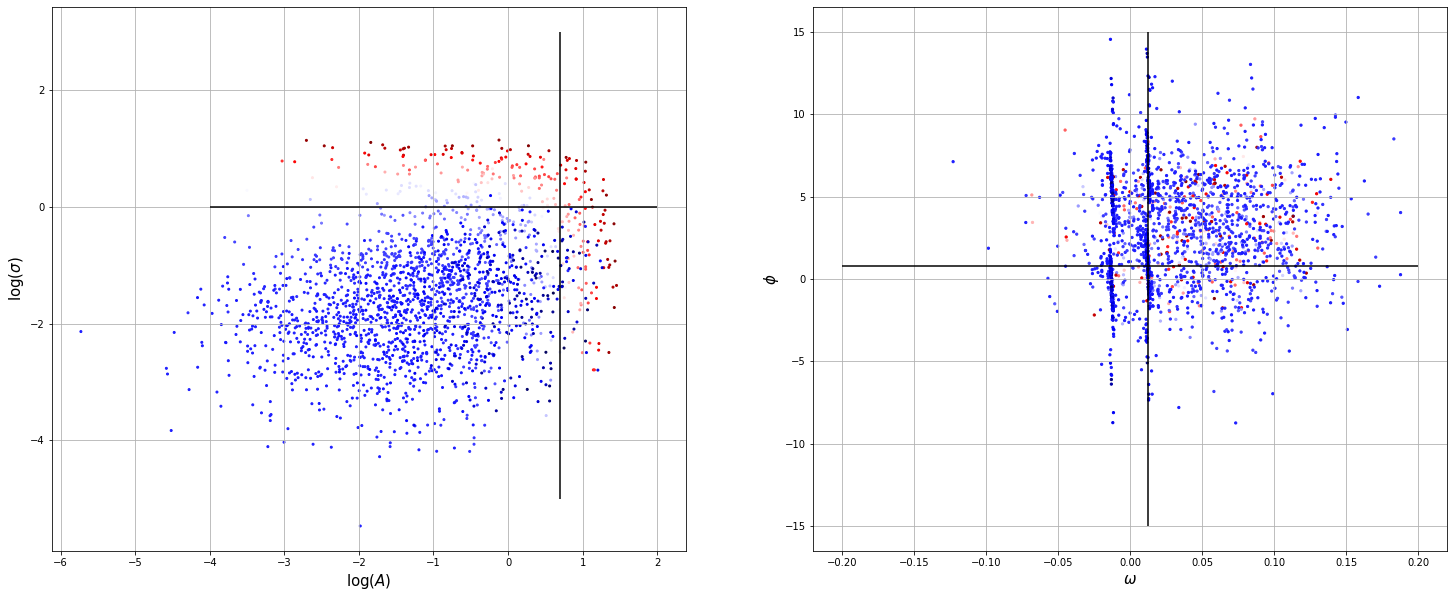

In [67]:
#@title <font size=3> *checking concentration*
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.scatter(cm_theta_accep_history[:,0], cm_theta_accep_history[:,3],c=cosine_epsilon,s=4,cmap="seismic")
plt.hlines(y=0,xmin=-4,xmax=2)
plt.vlines(x=np.log(2),ymin=-5,ymax=3)
plt.xlabel(r'$\log(A)$', fontsize='15')
plt.ylabel(r'$\log(\sigma)$',fontsize='15')
plt.grid()
plt.subplot(1,2,2)
plt.scatter(cm_theta_accep_history[:,1], cm_theta_accep_history[:,2],c=cosine_epsilon,s=5,cmap="seismic")
plt.hlines(y=pi/4,xmin=-0.2,xmax=0.2)
plt.vlines(x=1/80,ymin=-15,ymax=15)
plt.xlabel(r'$\omega$',fontsize='15')
plt.ylabel(r'$\phi$',fontsize='15')
plt.grid()

__**Comments:**__

Here we represent values of particles sampled with ABC and curve mathcing distance colored according to the curve matching distance between generated $\hat y$ with them and the true observed $y$. It should be noted that the concentration of the curve matching posteriori is not really relevant around the true data generating parameters. Maybe it's due to the $\alpha$-quantile procedure whose $\epsilon_t$ were chosen. Silk,Filippi and  all show that with this procedure, we have not guarantee that the ABC posterior distribution $\pi_{\epsilon_T} (\theta|x^*)$ converges to the true posterior $\pi (\theta|x^*)$ ("*Optimizing Threshold–Schedules for Approximate Bayesian Computation Sequential Monte Carlo Samplers: Applications to
Molecular Systems*", page 3, arXiv:1210.3296v1  [stat.CO]  11 Oct 2012). In fact if first samples are in a region that offer a little support of the posterior,  there is a risk of getting stuck in this parameter
region.

## <font size="4" > $\textbf{IV.3. Approximation of the Wasserstein distance by the Swapping distance and by the Sinkhorn distance}$ </font>

We had to present some less expensive methods to approximate the exact Wasserstein distance. In this section we will test the contribution and accuracy of these methods.

In [0]:
# Let's define swapping distance presented above #
# algo inspired of https://github.com/pierrejacob/winference/blob/master/R/metrics.R
def swapsweep(permutation, costmatrix, totalcost):
    """
    Inputs:
    ----------------
    Outputs:
    -----------------
    """
    n = costmatrix.shape[0]
    for i in range (n):
        perm_i = permutation[i]
        for j in range(i+1,n):
            perm_j = permutation[j]
            currentcost = costmatrix[i, perm_i] + costmatrix[j, perm_j]
            proposedcost = costmatrix[i, perm_j] + costmatrix[j, perm_i]
            if (proposedcost < currentcost):
                permutation[i] = perm_j
                permutation[j] = perm_i
                perm_i = perm_j
                totalcost = totalcost - currentcost + proposedcost
          
    return [totalcost, permutation]

def swap_distance( p, nsweeps, tolerance):
    """
    Inputs:
    --------------
    Outputs:
    ---------------
    """
    def distance(u_values, v_values):
        u_values = np.array(u_values)
        v_values = np.array(v_values)
   
        length = len(u_values)
        permutation = np.arange(len(u_values))
        costmatrix = np.power(ot.dist(u_values, v_values,metric = "euclidean"), p)
        totalcost = np.sum([costmatrix[i,permutation[i]] for i in range(length)])

        previous_totalcost = totalcost
        isweep = 0
        #error =  Inf
        while((isweep < nsweeps)):
            #print(totalcost)
            isweep =  isweep + 1
            swapsweep_results = swapsweep(permutation, costmatrix, totalcost)
            permutation =  swapsweep_results[1] 
            totalcost = swapsweep_results[0]
            error = np.abs(totalcost - previous_totalcost) / length
            if (error < tolerance):
                break
            previous_totalcost = np.power(totalcost/length,1/p)
        return np.power(totalcost/length, 1/p)
    return distance

In [0]:
# Let's define swapping distance presented above 
# We use the package POT
def sinkhorn(p,zeta):
    """
    Inputs
    -----------
    p: order of the wasserstein distance
    zeta: regularizer parameter
    Outputs
    -----------
    distance: function which return estimating p-wasserstein distance between two sets
    """
    try:
        if p > 0:
            def distance(u_values, v_values):
                """
                Inputs
                ---------
                u_values: dataset, type array or list, shape = (n,.)
                v_values: dataset, type array or list, shape = (n,.)

                Outputs
                ---------
                dist: scalar, value of distance
                """
                a, b = ot.unif(len(u_values)), ot.unif(len(v_values))
                if np.array(u_values)[0].shape!=():
                    M  = np.power(ot.dist(u_values, v_values, metric='euclidean'),p)
                else:
                    M =np.zeros((len(u_values), len(v_values)))
                    for i in range(len(u_values)):
                        for j in range(len(v_values)):
                            M[i,j] = np.abs(u_values[i]-v_values[j])
                    M = np.power(M,p)
                dist = np.power(ot.sinkhorn2(a,b,M,zeta),1/p)
                return dist
    except:
        print("p must be strictly positive")
    return distance

In [0]:
# Define prior et y sampler
#@title <font size="3">*setting parameters and generating data*</font> {display-mode:"code"}
# Define true parameters and generate data
ns = [x for x in range(10, 102, 10)]

timing_wass_list = []
timing_swap_list = []
timing_sink_list = []

for n in ns:
  print("n = {}".format(n))
  mu_true = [-0.71, 0.09]
  sigma_true = [[1, 0.5],[0.5,1]]
  y_true = np.random.multivariate_normal(mu_true, sigma_true, n)

  # Define prior parameters
  mu_prior = [0,0]
  sigma_prior = [[25, 0],[0, 25]]

  # Define prior et y sampler
  n_samples = 1
  p = 2
  prior = gaussian(mu=mu_prior, sigma=sigma_prior, multi=True)
  y_sampler = gaussian_sampler(mu=None, sigma=sigma_true, multi=True)

  theta_list = prior.random(n_samples)
  length = len(y_true)
  list_y_hat = []
  for theta in theta_list:
      list_y_hat.append(y_sampler(theta,length))
  
  timing_wass = %timeit -n 10 -o wasserstein(p=2)(list_y_hat[0],y_true)
  timing_swap = %timeit -n 10 -o swap_distance(p=2, nsweeps=10, tolerance=1e-2)(list_y_hat[0],y_true)
  timing_sink = %timeit -n 10 -o sinkhorn(p=2, zeta=0.3)(list_y_hat[0],y_true)

  timing_wass_list.append(timing_wass)
  timing_swap_list.append(timing_swap)
  timing_sink_list.append(timing_sink)
  print('___________________________________')
  

n = 10
10 loops, best of 3: 2.74 ms per loop
10 loops, best of 3: 629 µs per loop
10 loops, best of 3: 3.18 ms per loop
___________________________________
n = 20
10 loops, best of 3: 9.29 ms per loop
10 loops, best of 3: 2.16 ms per loop
10 loops, best of 3: 4.02 ms per loop
___________________________________
n = 30
10 loops, best of 3: 21.3 ms per loop
10 loops, best of 3: 4.6 ms per loop
10 loops, best of 3: 6.37 ms per loop
___________________________________
n = 40
10 loops, best of 3: 32.9 ms per loop
10 loops, best of 3: 8.44 ms per loop
10 loops, best of 3: 6.03 ms per loop
___________________________________
n = 50
10 loops, best of 3: 62.1 ms per loop
10 loops, best of 3: 12.6 ms per loop
10 loops, best of 3: 5.78 ms per loop
___________________________________
n = 60
10 loops, best of 3: 82.7 ms per loop
10 loops, best of 3: 18 ms per loop
10 loops, best of 3: 6.73 ms per loop
___________________________________
n = 70
10 loops, best of 3: 105 ms per loop
10 loops, best of 

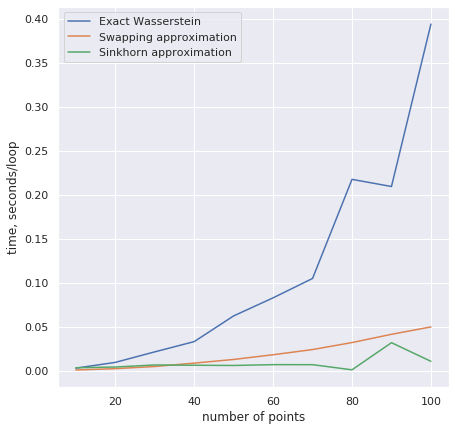

In [0]:
f, ax = plt.subplots(figsize=(7, 7))
plt.ylabel("time, seconds/loop")
plt.xlabel("number of points")
sns.lineplot(ns, [timing.best for timing in timing_wass_list])
sns.lineplot(ns, [timing.best for timing in timing_swap_list])
sns.lineplot(ns, [timing.best for timing in timing_sink_list]).legend(['Exact Wasserstein', 'Swapping approximation', 'Sinkhorn approximation'])
plt.show()

**Distance comparaison**

After comparing time computation, now we can try to compare how much approximation results differ from the exact Wasserstein distance.

In [0]:
list_y_hat = []
for theta in wasserstein_theta:
      list_y_hat.append(y_sampler(theta,length))

In [0]:
exact = []
swap = []
sinkhorn1 = []
sinkhorn2 = []
for y_hat in list_y_hat:
    exact.append(fast_wasserstein(2)(y_true, y_hat))
    swap.append(swap_distance(p=2, nsweeps=10, tolerance=1e-2)(y_true,y_hat))
    sinkhorn1.append(sinkhorn(p=2, zeta=1)(y_true,y_hat))
    sinkhorn2.append(sinkhorn(p=2, zeta=0.3)(y_true,y_hat))

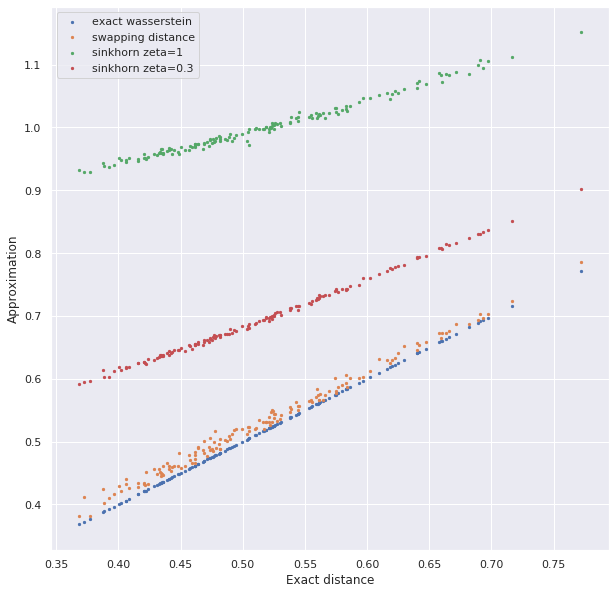

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(x=exact, y=exact, s=5, label='exact wasserstein')
plt.scatter(x=exact, y=swap,s=5, label='swapping distance')
plt.scatter(x=exact, y=sinkhorn1,s=5, label='sinkhorn zeta=1')
plt.scatter(x=exact, y=sinkhorn2,s=5 ,label='sinkhorn zeta=0.3')
plt.xlabel('Exact distance')
plt.ylabel('Approximation')
plt.legend()
plt.show()

**Comments**:  
We can note that the swapping estimation better estimates the Wasserstein distance and from what we have presented above requires less computation time.
It can also be noted that the Sinkhorn diverges from the exact distance more significantly as the Wasserstein value is smaller, and becomes closer to the exact distance when the Wasserstein distance is bigger. However, the Swapping distance always remains close to the exact value.